In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

/home/enrique/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


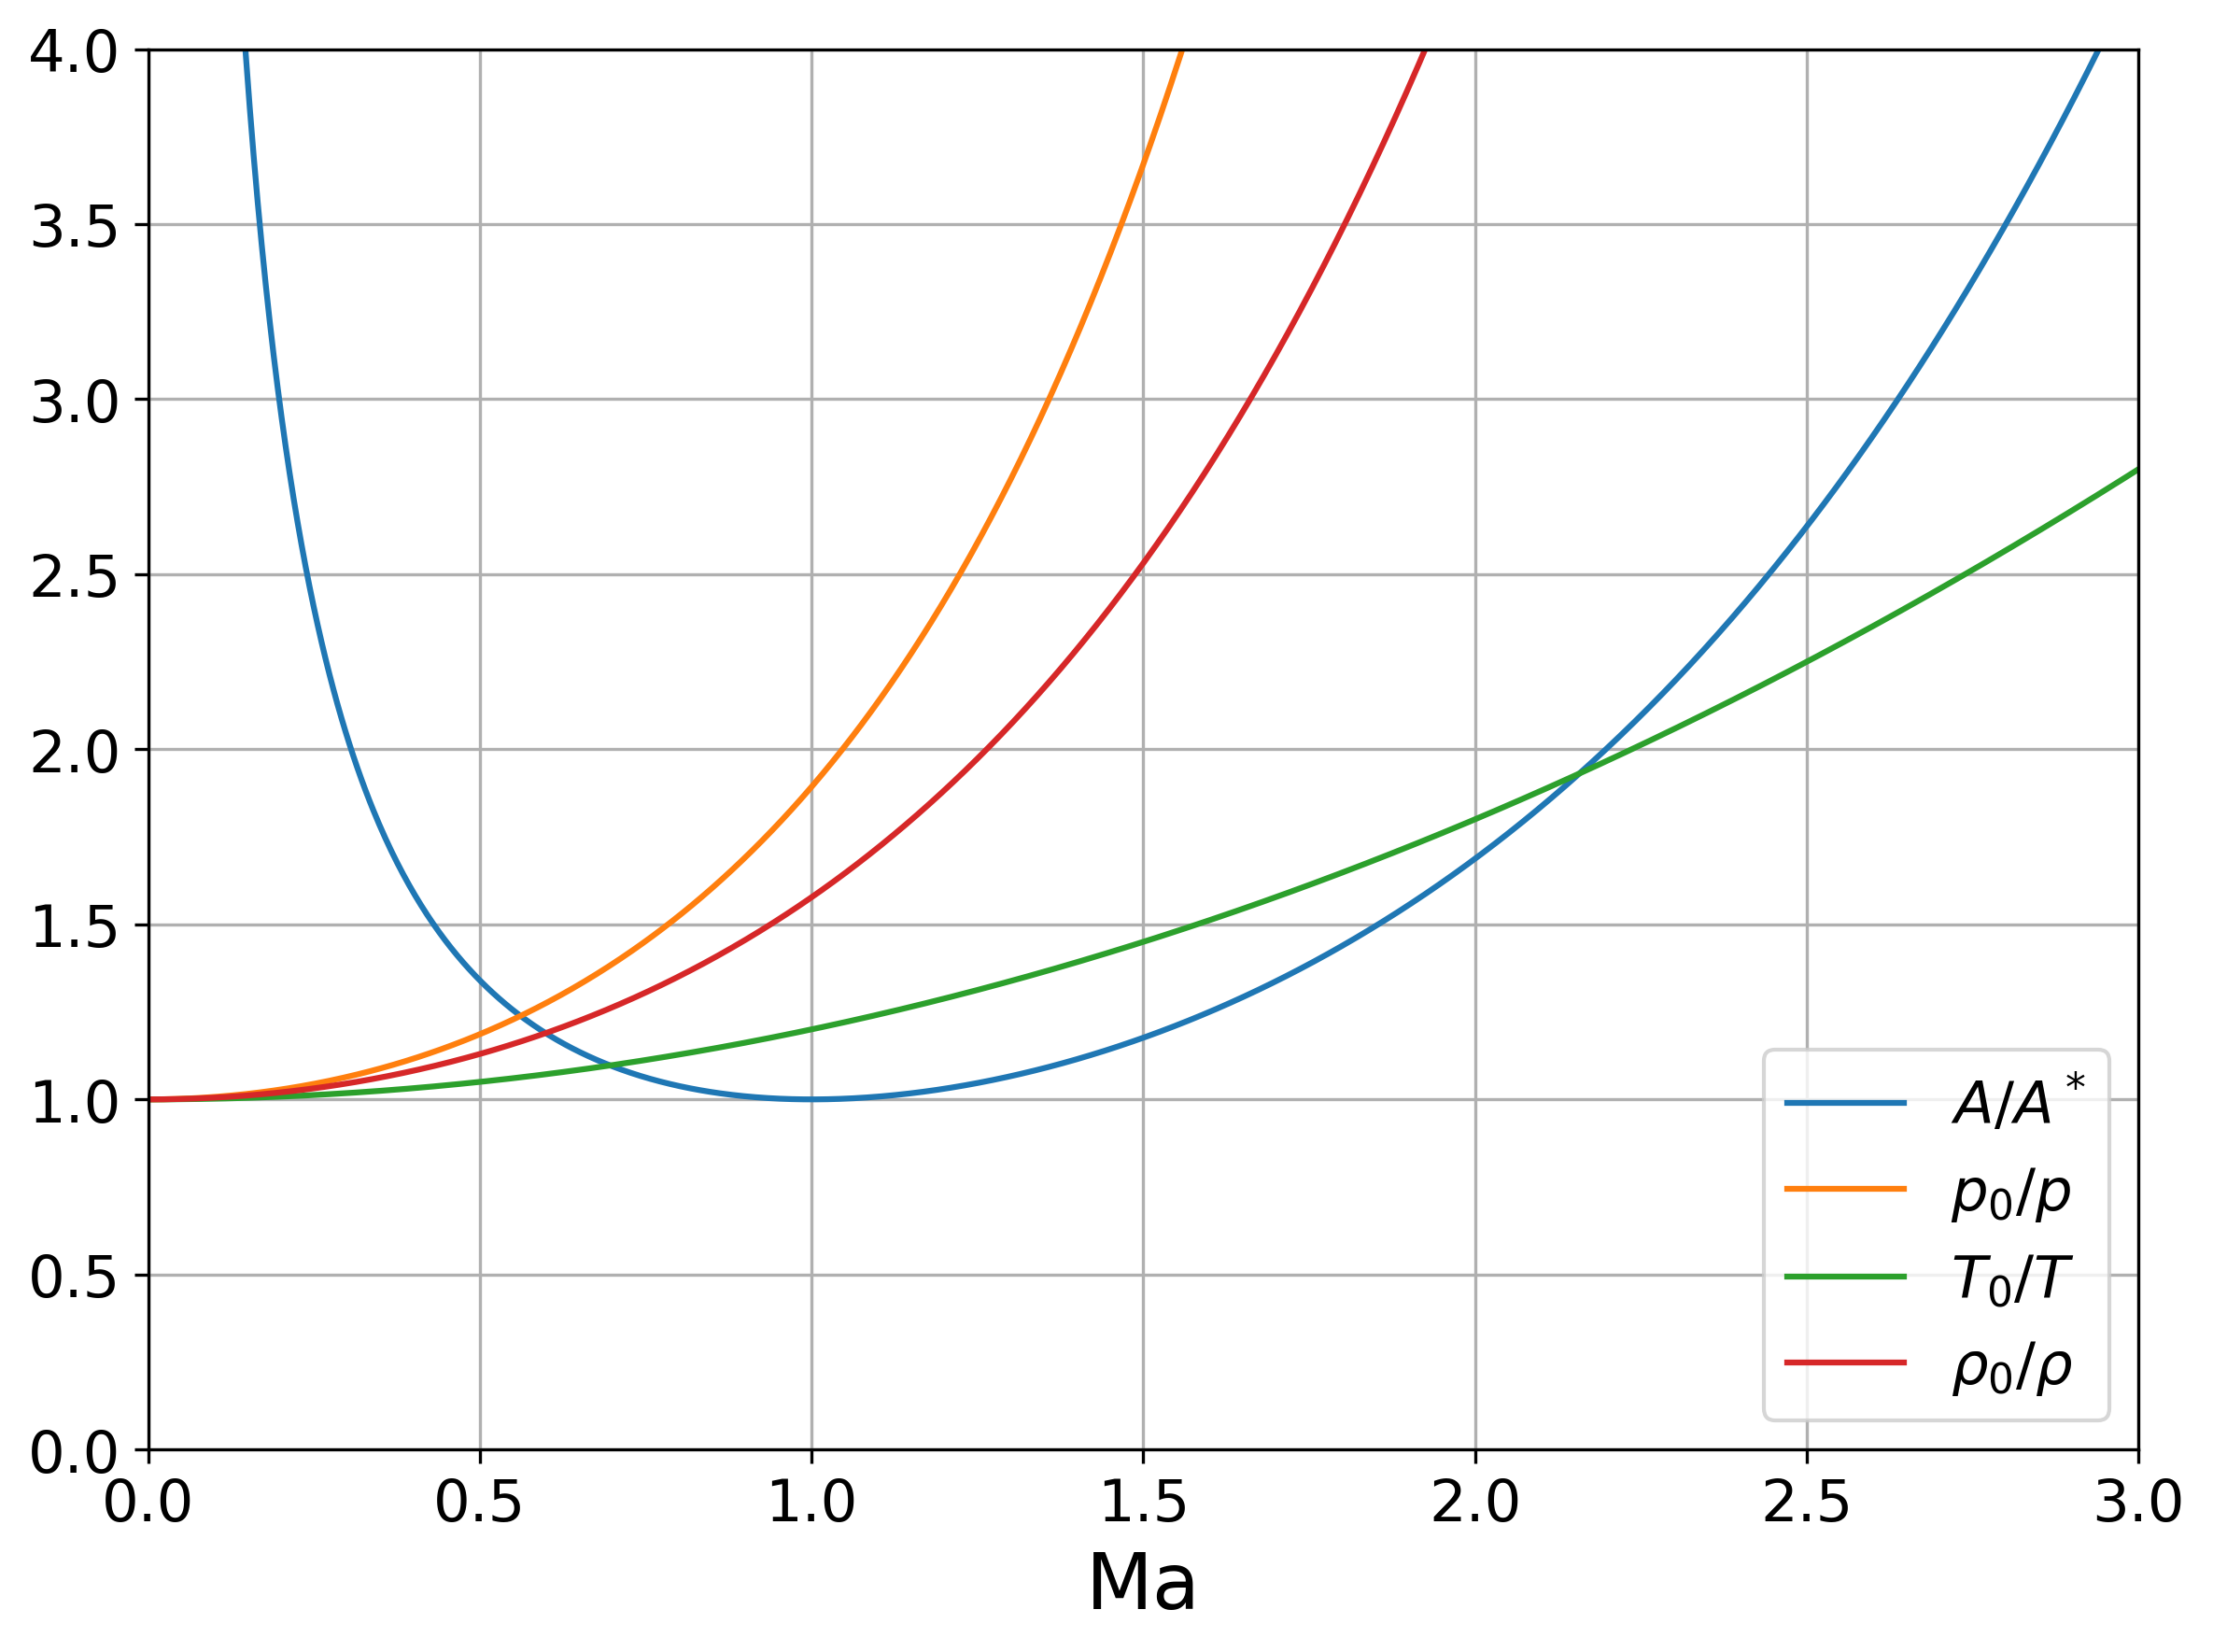

In [2]:
fig=plt.figure(figsize=(8,6),dpi=300)
ax=fig.add_subplot(111)
Ma=np.linspace(0,3,1000)
k=1.4

A=np.multiply(np.power(Ma,-1),np.power(1+0.2*np.power(Ma,2),3))/1.728
T0=1+0.2*np.power(Ma,2)
rho0=np.power(1+0.2*np.power(Ma,2),2.5)
p0=np.power(1+0.2*np.power(Ma,2),3.5)
ax.plot(Ma,A,label=r'$A/A^*$')
ax.plot(Ma,p0,label=r'$p_0/p$')
ax.plot(Ma,T0,label=r'$T_0/T$')
ax.plot(Ma,rho0,label=r'$\rho_0/\rho$')

ax.set_xticks(np.arange(0,3.5,0.5))
ax.set_yticks(np.arange(0,4.5,0.5))

ax.set_xlim(0,3)
ax.set_ylim(0,4)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid('True')
ax.legend(fontsize=15,loc='lower right')
ax.set_xlabel('Ma',fontsize=20)
plt.tight_layout()
plt.savefig('isoentropico.eps')
plt.savefig('isoentropico.png')

In [14]:
Ma=np.arange(0,5.05,0.05)

k=1.4

A=np.multiply(np.power(Ma,-1),np.power(1+0.2*np.power(Ma,2),3))/1.728
T0=1+0.2*np.power(Ma,2)
rho0=np.power(1+0.2*np.power(Ma,2),2.5)
p0=np.power(1+0.2*np.power(Ma,2),3.5)

fo=open('isoentropico.dat','w')
for i in range(len(Ma)):
    fo.write('$%6.2f$ & '%Ma[i])
    fo.write('$%6.4f$ &'%p0[i])
    fo.write('$%6.4f$ & '%T0[i])
    fo.write('$%6.4f$ & '%rho0[i])
    fo.write('$%6.4f$  '%A[i])
    fo.write(r'\\')
    fo.write('\n')

/home/enrique/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


/home/enrique/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


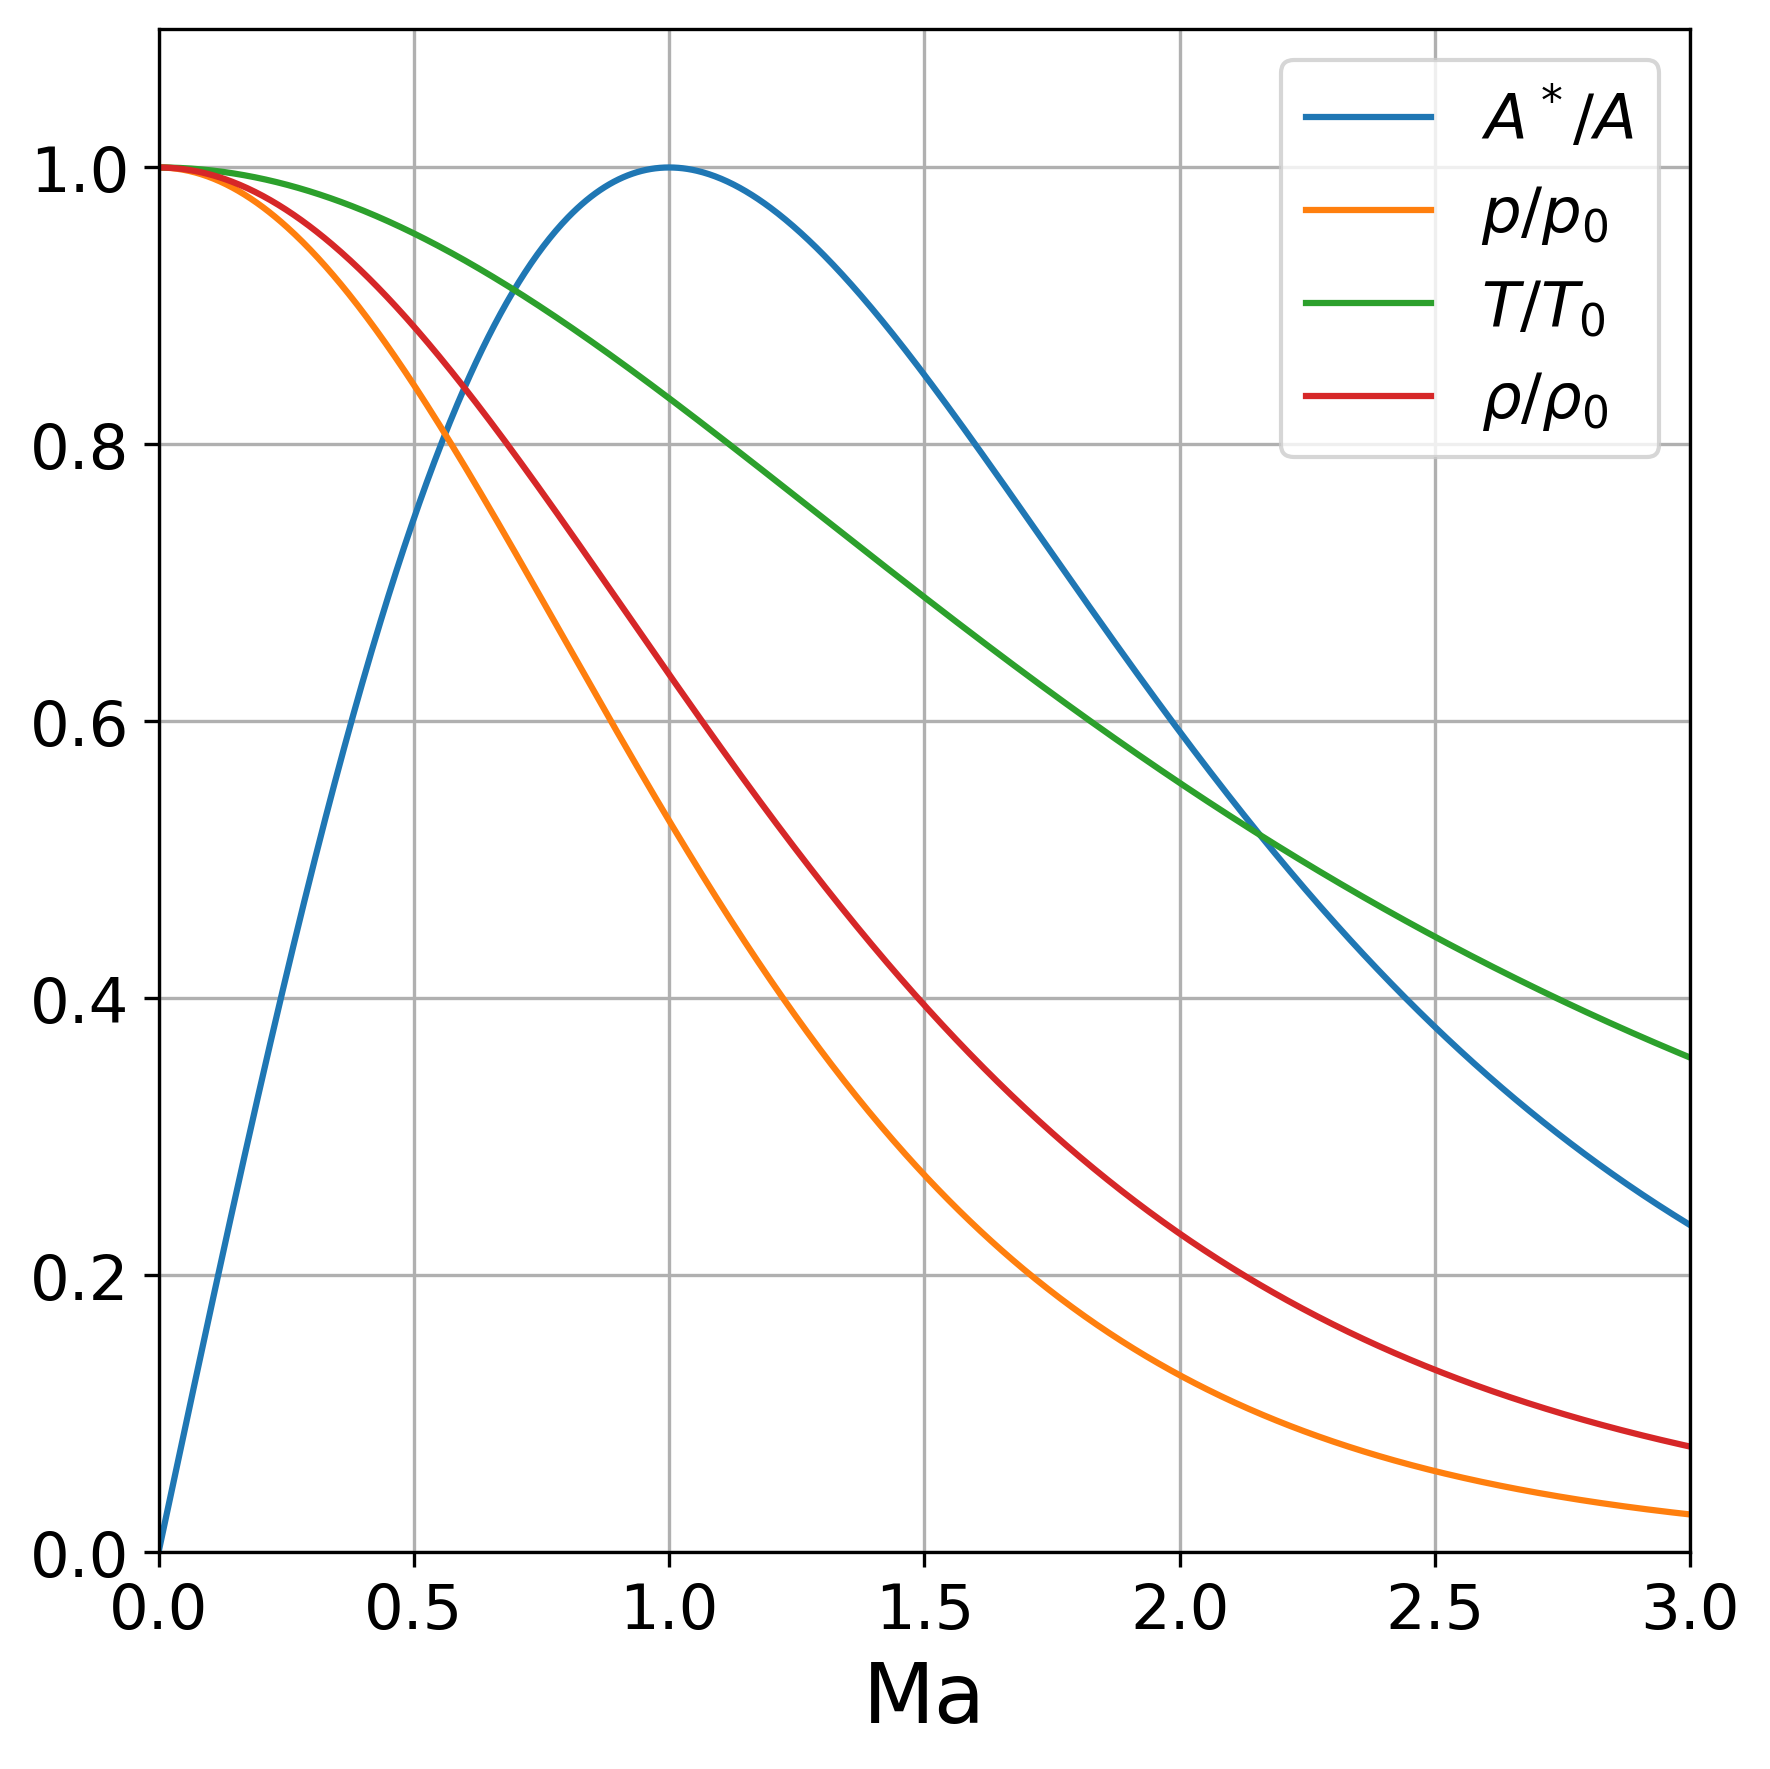

In [4]:
fig=plt.figure(figsize=(6,6),dpi=300)
ax=fig.add_subplot(111)
Ma=np.linspace(0,3,1000)
k=1.4

A=np.multiply(np.power(Ma,-1),np.power(1+0.2*np.power(Ma,2),3))/1.728
A=np.power(A,-1)
T0=1+0.2*np.power(Ma,2)
T0=np.power(T0,-1)
rho0=np.power(1+0.2*np.power(Ma,2),2.5)
rho0=np.power(rho0,-1)
p0=np.power(1+0.2*np.power(Ma,2),3.5)
p0=np.power(p0,-1)
ax.plot(Ma,A,label=r'$A^*/A$')
ax.plot(Ma,p0,label=r'$p/p_0$')
ax.plot(Ma,T0,label=r'$T/T_0$')
ax.plot(Ma,rho0,label=r'$\rho/\rho_0$')

ax.set_xlim(0,3)
ax.set_ylim(0,1.1)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid('True')
ax.legend(fontsize=15,loc='upper right')
ax.set_xlabel('Ma',fontsize=20)
plt.tight_layout()
plt.savefig('isoentropico2.eps')
plt.savefig('isoentropico2.png')

In [5]:
Ma=2.425
A=np.multiply(np.power(Ma,-1),np.power(1+0.2*np.power(Ma,2),3))/1.728
T0=1+0.2*np.power(Ma,2)
rho0=np.power(1+0.2*np.power(Ma,2),2.5)
p0=np.power(1+0.2*np.power(Ma,2),3.5)
print(A)
print(T0)
print(p0)

2.4592123649298285
2.176125
15.201744677633553


In [6]:
eo=lambda x:(1+0.2*x**2)**3-4*1.728*x
ma2=scipy.optimize.newton(eo,0.2)
print(ma2)

0.1465482139518789


In [7]:
def eo(Ma):
    A=np.multiply(np.power(Ma,-1),np.power(1+0.2*np.power(Ma,2),3))/1.728
    T0=1+0.2*np.power(Ma,2)
    rho0=np.power(1+0.2*np.power(Ma,2),2.5)
    p0=np.power(1+0.2*np.power(Ma,2),3.5)
    print(1/p0,A)

    return(2-1/p0*A)
Mae=scipy.optimize.newton(eo,0.5)
print(Mae)

0.843019175422553 1.3398437500000002
0.8429348662804744 1.3395567472346577
0.98788538574177 4.4277948638626405
0.8949474610312935 1.5857221768003702
0.9194593980789059 1.7848123413561099
0.9531146609155614 2.294447644940865
0.9424861145297662 2.0841518215423984
0.9442565070457358 2.1148529635162276
0.9444197541169082 2.117759563919734
0.9444169051097043 2.117708724877081
0.2869975776024719


In [8]:
k=1.4
def eop(Ma):
    p02p01=np.power(np.divide(np.multiply(k+1,np.power(Ma,2)),2+np.multiply(k-1,np.power(Ma,2))),(k/(k-1)))
    p02p01=np.multiply(p02p01,np.power(np.divide(k+1,np.multiply(2*k,np.power(Ma,2))-(k-1)),1/(k-1)))
    return 0.5295-p02p01
Ma1=scipy.optimize.newton(eop,0.5)
print(Ma1)

2.4253885381922275


In [9]:
Ma=0.5205
A=np.multiply(np.power(Ma,-1),np.power(1+0.2*np.power(Ma,2),3))/1.728
T0=1+0.2*np.power(Ma,2)
rho0=np.power(1+0.2*np.power(Ma,2),2.5)
p0=np.power(1+0.2*np.power(Ma,2),3.5)
print(T0)
print(p0)

1.05418405
1.2028391176842466
